# Analysis Demonstration for the Paper "Information Dynamics of a Nonlinear Stochastic Nanopore System"

## Objectives

* Demonstrate analysis performed in "Information Dynamics of a Nonlinear Stochastic Nanopore System" using the Specific Information Dynamics in Python (<tt>sidpy</tt>) Python Package.

## Code

In [1]:
%matplotlib nbagg

#### Load in the required Python packages.

In [2]:
import numpy
numpy.random.seed(1)

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cmx

from sidpy import *

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 18)

#### Set parameters for data length, inference, etc.

In [3]:
p_max = 10

nn_package = 'sklearn' # Deterministic, but slower.
# nn_package = 'pyflann' # Fast approximation, but non-deterministic.

# Determines the upper bound on the number of nearest neighbors to use
# for the computation of NLPL:

pow_upperbound = 0.5

# Determines the number of nearest neighbors to use in estimating 
# the specific entropy rate and normalized q-step specific entropy
# rate.

pow_neighbors = 0.5

# Specify whether the data is by-trial / epoched (multirealization)
# or not.

is_multirealization = False

#### Load in data

In [4]:
x = numpy.loadtxt('../example-data/data-snanopore/NRK5.txt')

x = x[::2]

#### Estimate the model order for q = 0 horizon

In [5]:
p_opt, nlpl_opt, nlpl_by_p, er_knn, ler_knn = choose_model_order_nlpl(x, p_max, pow_upperbound = pow_upperbound, nn_package = nn_package, is_multirealization = is_multirealization, announce_stages = False, output_verbose = True)

print('Chose p* = {}, giving ER(p*) = {}'.format(p_opt, er_knn))

For p = 0, with NLPL(k = 5) = 0.33785117018334504


../sidpy/sidpy.py:1272: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


####################################################
# Warning: For p = 1, Nelder-Mead is choosing k* near k_upper = 200.
# Increase pow_upperbound.
####################################################
For p = 1, with NLPL(h* = 0.038645851009031416, k* = 200) = -1.1282177852527893


../sidpy/sidpy.py:1272: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 2, with NLPL(h* = 0.039783529850464155, k* = 110) = -1.1879559762580343


../sidpy/sidpy.py:1272: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 3, with NLPL(h* = 0.03806606093967061, k* = 102) = -1.20392631726094


../sidpy/sidpy.py:1272: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 4, with NLPL(h* = 0.03799835389151896, k* = 90) = -1.206714519747076


../sidpy/sidpy.py:1272: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 5, with NLPL(h* = 0.03742066741964738, k* = 91) = -1.2029280583724857


../sidpy/sidpy.py:1272: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 6, with NLPL(h* = 0.03692805066192553, k* = 89) = -1.1992532282351758


../sidpy/sidpy.py:1272: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 7, with NLPL(h* = 0.03868943021535678, k* = 72) = -1.1932487986961184


../sidpy/sidpy.py:1272: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 8, with NLPL(h* = 0.038820668679331774, k* = 73) = -1.1868447710098908


../sidpy/sidpy.py:1272: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 9, with NLPL(h* = 0.03999742392423574, k* = 61) = -1.1813056862245177


../sidpy/sidpy.py:1272: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 10, with NLPL(h* = 0.040465938809321436, k* = 61) = -1.174990508128742
Chose p* = 4, giving ER(p*) = -1.2573779337510909


<IPython.core.display.Javascript object>


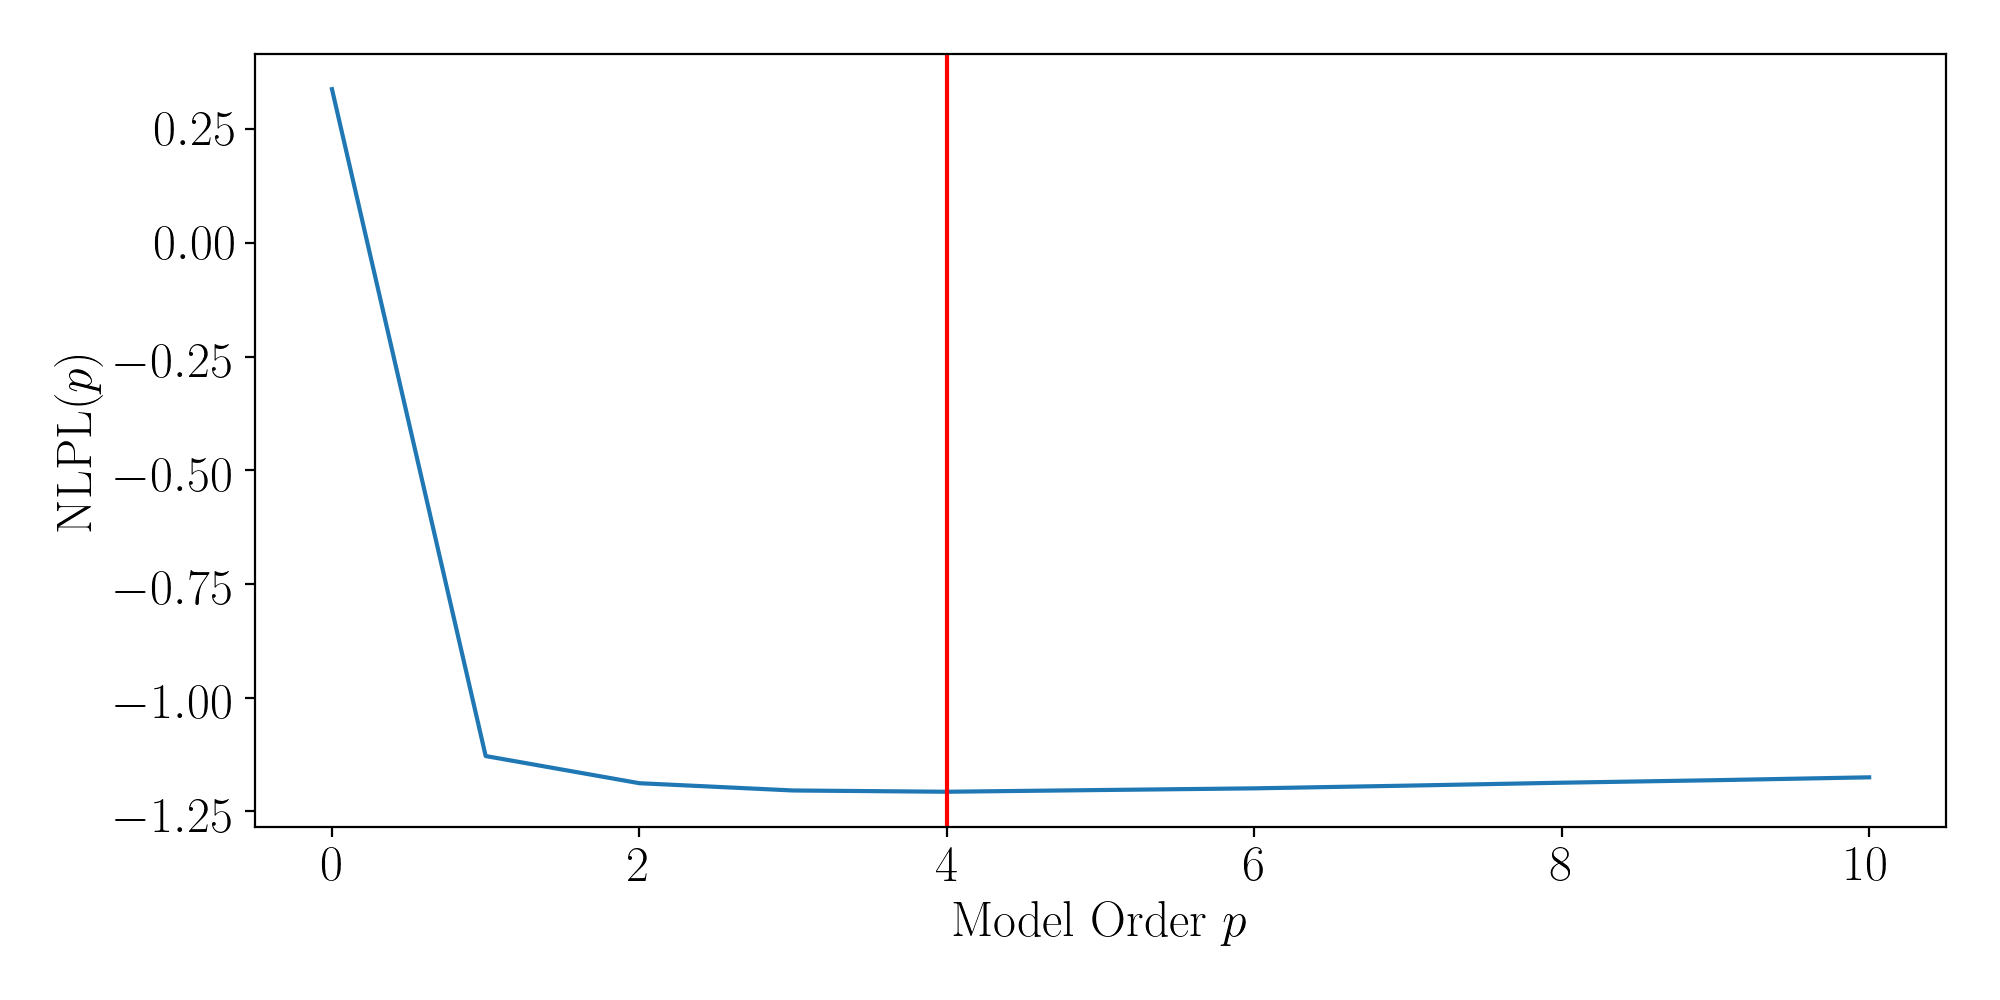

In [6]:
plt.figure(figsize = (10, 5))
plt.plot(range(0, p_max + 1), nlpl_by_p)
plt.xlabel('Model Order $p$')
plt.ylabel('NLPL$(p)$')
plt.axvline(p_opt, color = 'r')
plt.tight_layout()

#### Estimate the local and specific entropy rates

In [7]:
print('Estimating local entropy rate in-sample...')

ler = estimate_ler_insample(x, p_opt = p_opt, pow_neighbors = pow_neighbors)

Estimating local entropy rate in-sample...


In [8]:
print('Estimating specific entropy rate in-sample...')

ser = estimate_ser_insample(x, ler_knn, p_opt = p_opt, pow_neighbors = pow_neighbors)

Estimating specific entropy rate in-sample...


<IPython.core.display.Javascript object>


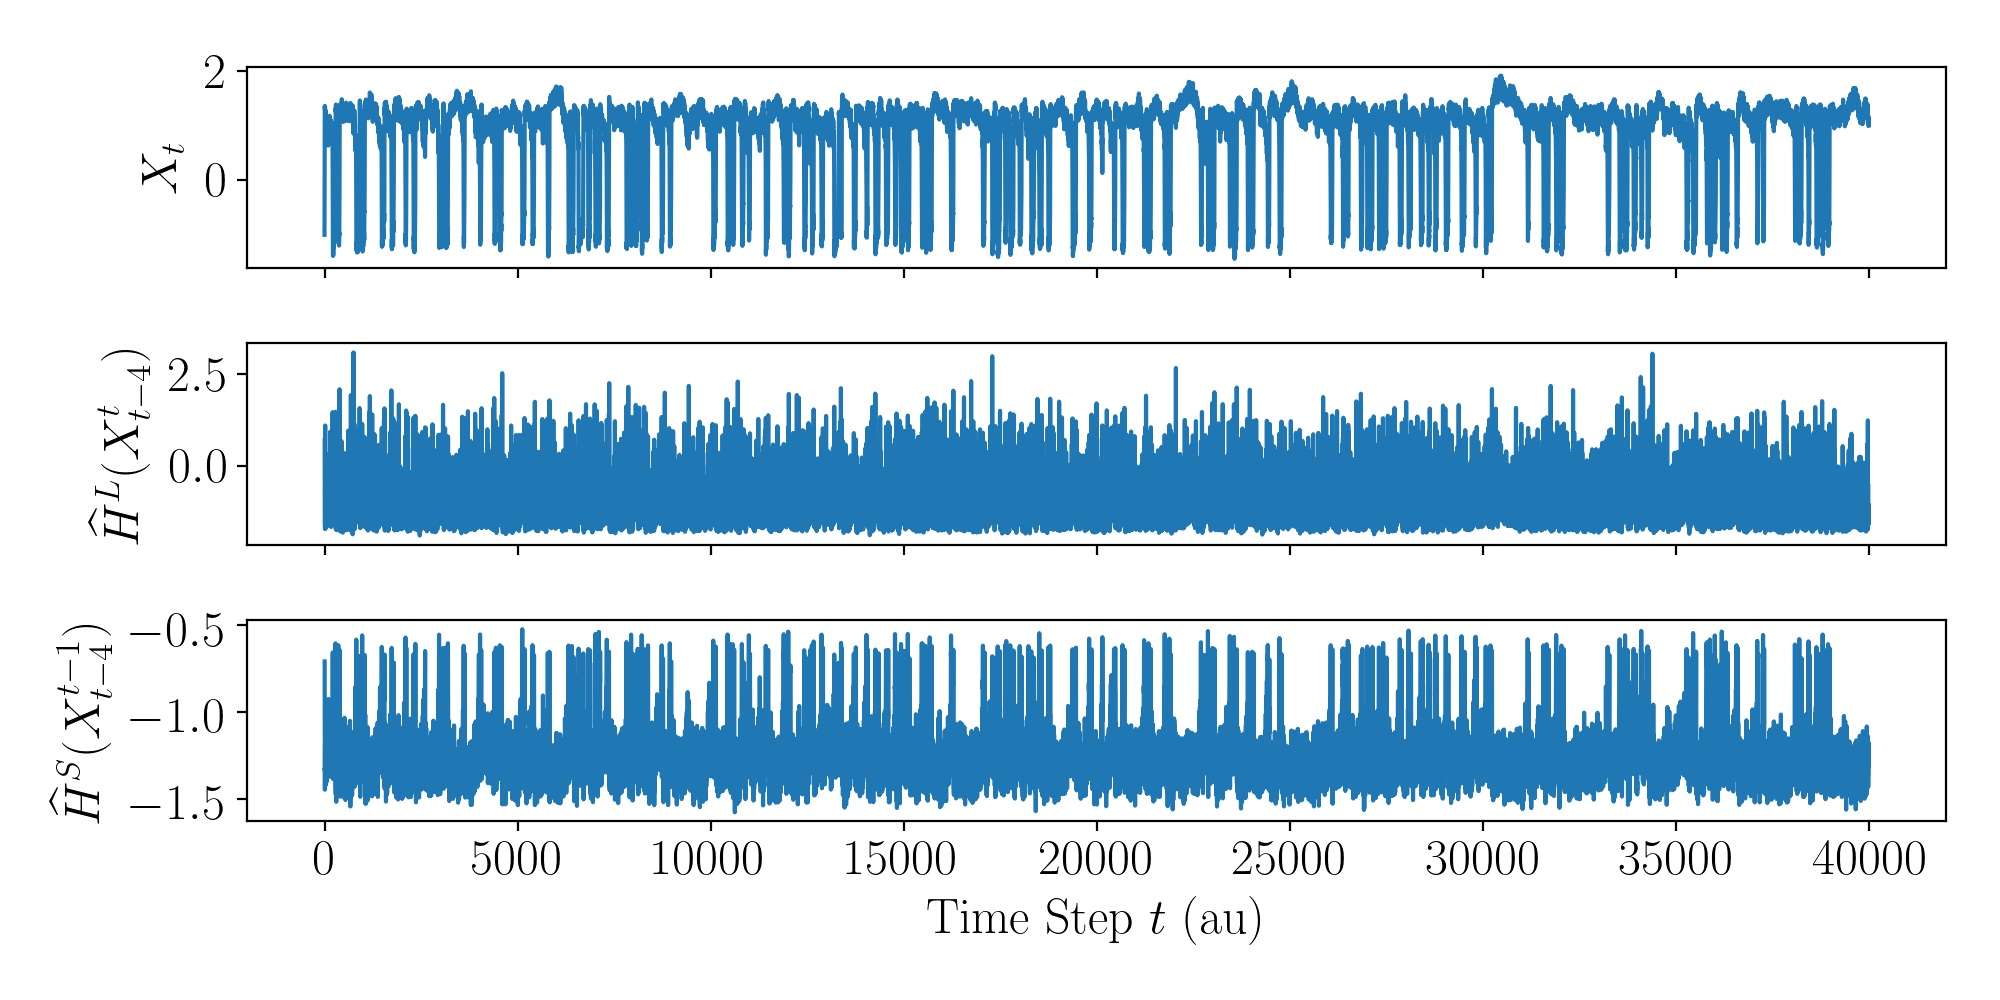

<IPython.core.display.Javascript object>


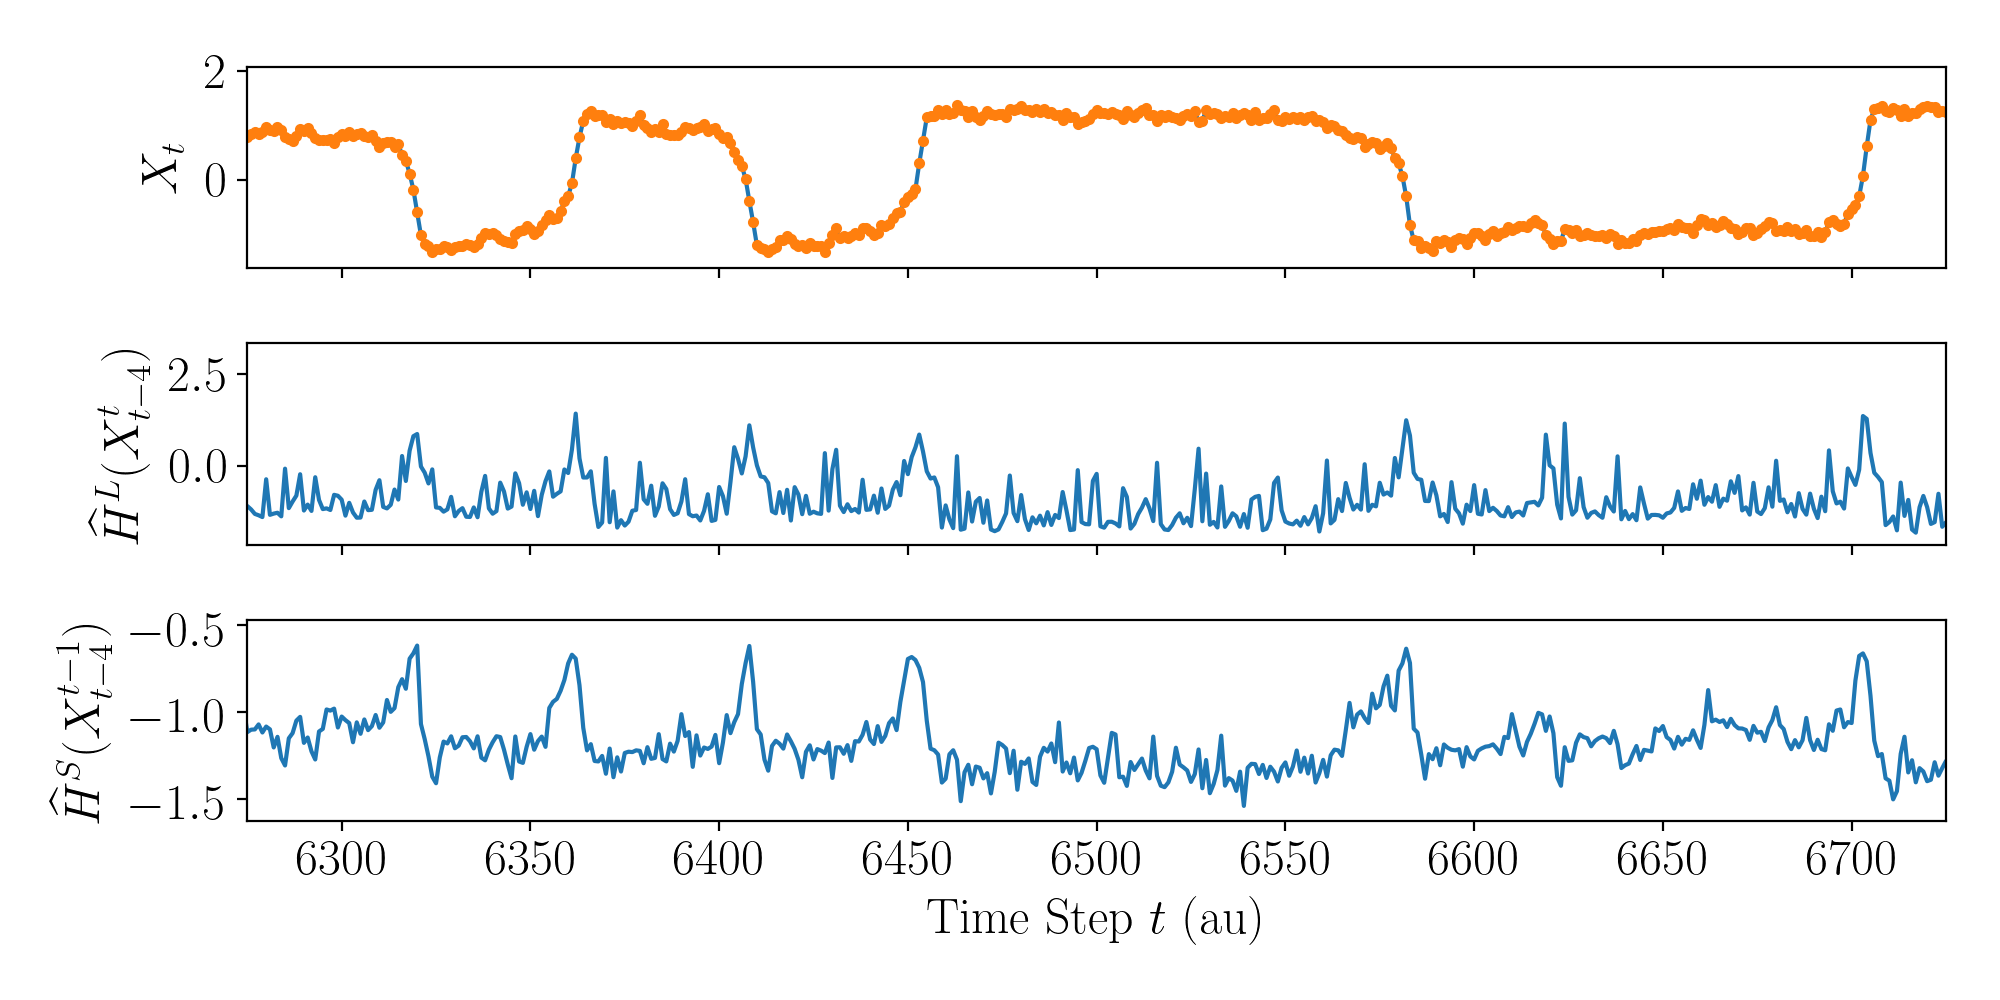

In [9]:
# Compare time series, LER, and SER for the full time series.

fig, ax = plt.subplots(3, 1, sharex = True, figsize = (10, 5))
ax[0].plot(x)
ax[0].set_ylabel('$X_{t}$')
ax[1].plot([numpy.nan]*p_opt + ler.tolist())
ax[1].set_ylabel('$\\widehat{{H}}^{{L}}(X_{{t-{}}}^{{t}})$'.format(p_opt))
ax[2].plot([numpy.nan]*p_opt + ser.tolist())
ax[2].set_ylabel('$\\widehat{{H}}^{{S}}(X_{{t-{}}}^{{t-1}})$'.format(p_opt))
ax[2].set_xlabel('Time Step $t$ (au)')
plt.tight_layout()

fig, ax = plt.subplots(3, 1, sharex = True, figsize = (10, 5))
ax[0].plot(x)
ax[0].plot(x, '.')
ax[0].set_ylabel('$X_{t}$')
ax[1].plot([numpy.nan]*p_opt + ler.tolist())
ax[1].set_ylabel('$\\widehat{{H}}^{{L}}(X_{{t-{}}}^{{t}})$'.format(p_opt))
ax[2].plot([numpy.nan]*p_opt + ser.tolist())
ax[2].set_ylabel('$\\widehat{{H}}^{{S}}(X_{{t-{}}}^{{t-1}})$'.format(p_opt))
ax[2].set_xlabel('Time Step $t$ (au)')
ax[2].set_xlim([6275, 6725])
plt.tight_layout()

#### Plot a projection of the reconstructed state space shaded by the estimated local entropy rate or estimated specific entropy rate.

<IPython.core.display.Javascript object>


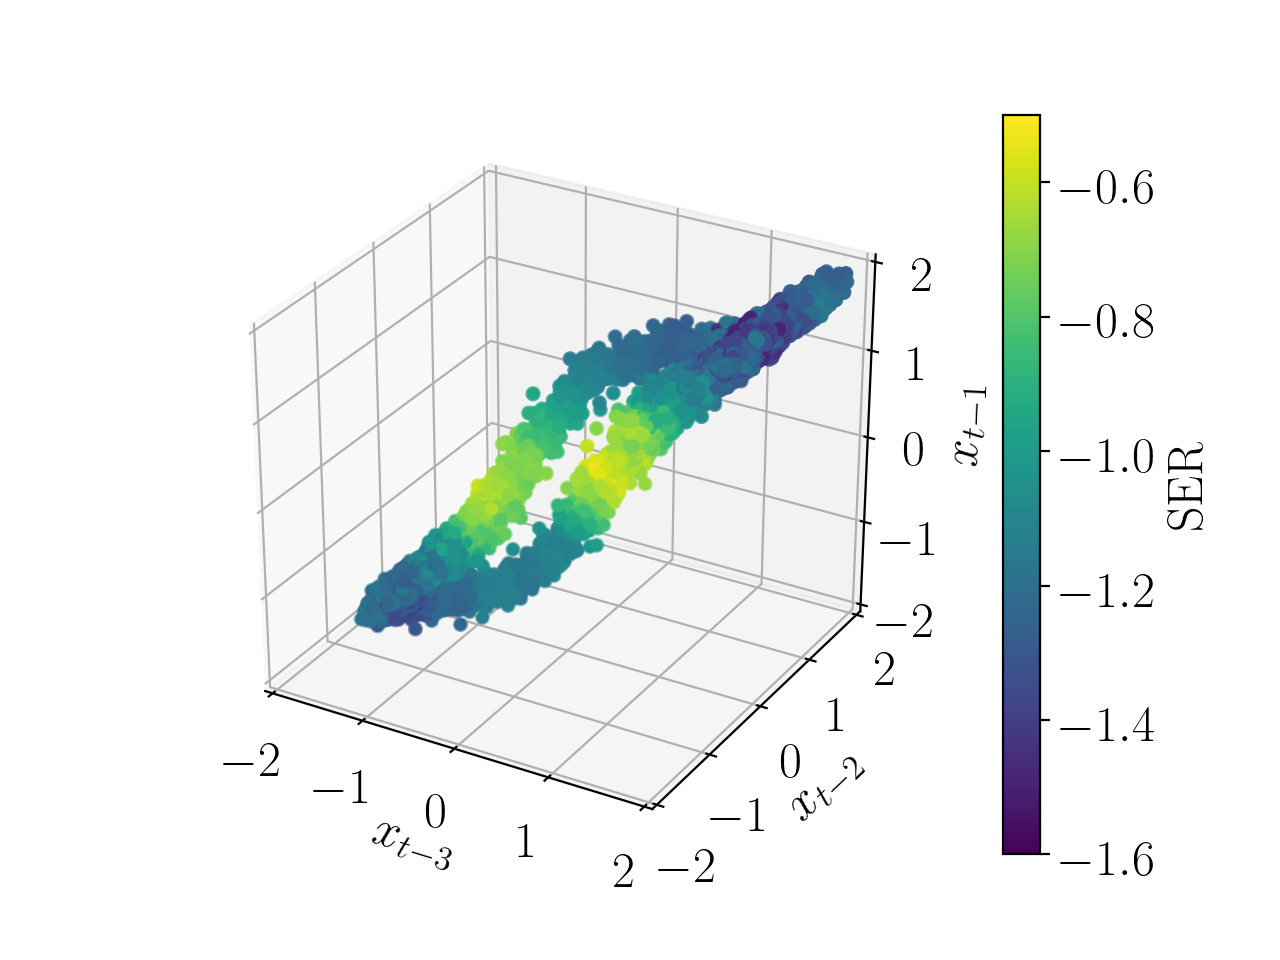

<IPython.core.display.Javascript object>


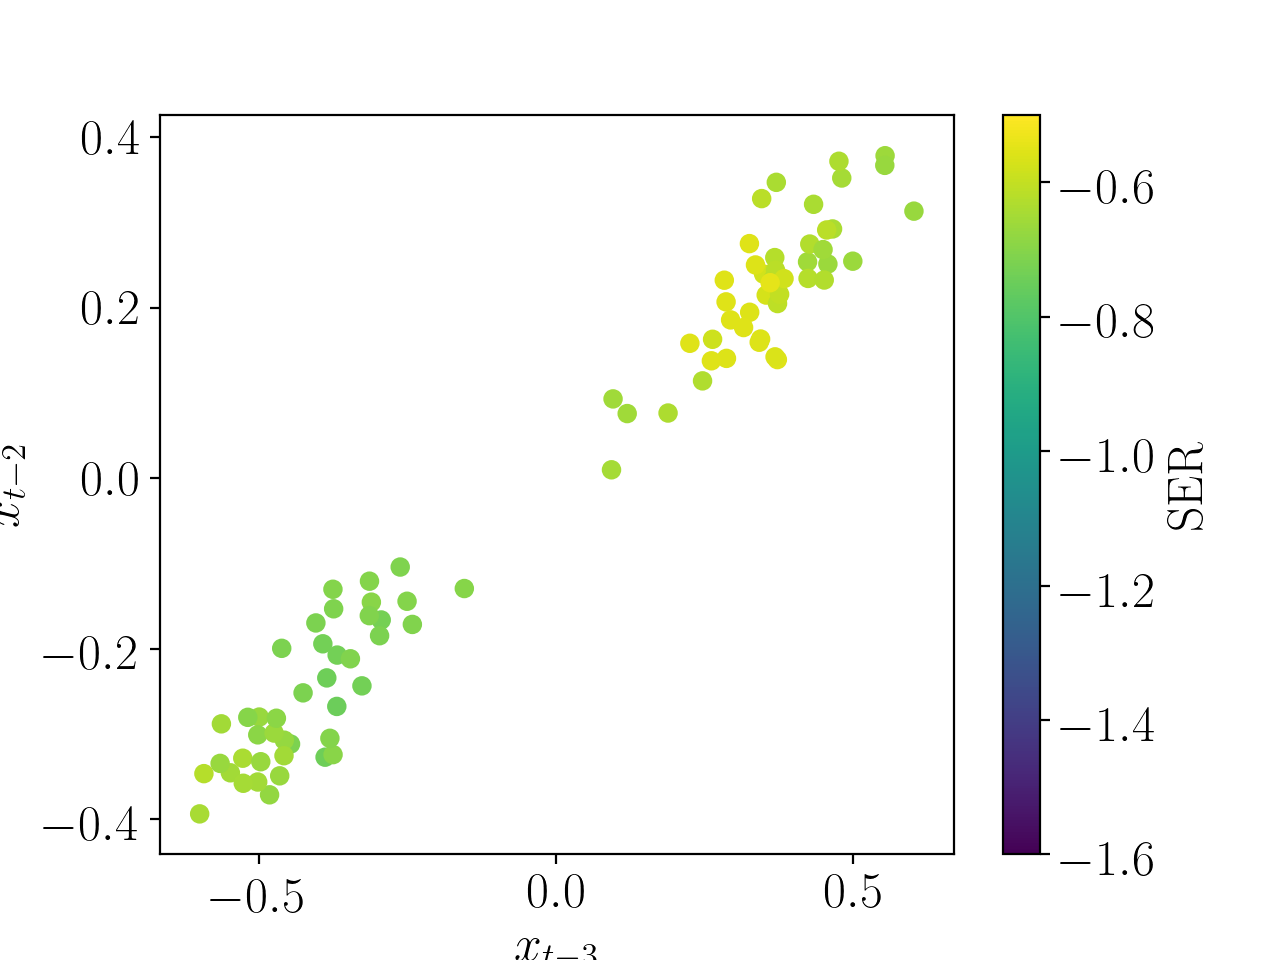

<IPython.core.display.Javascript object>


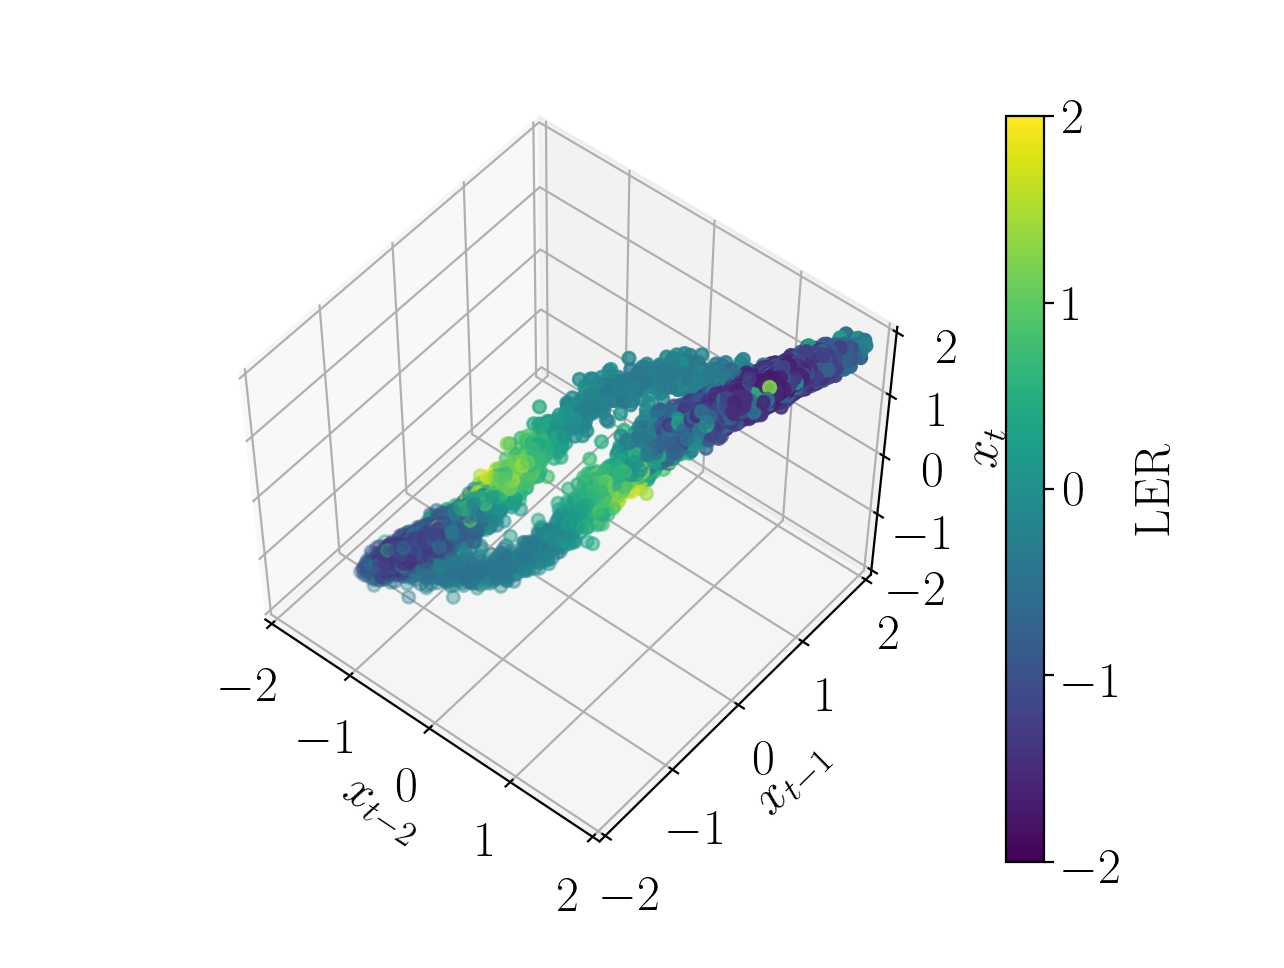

<IPython.core.display.Javascript object>


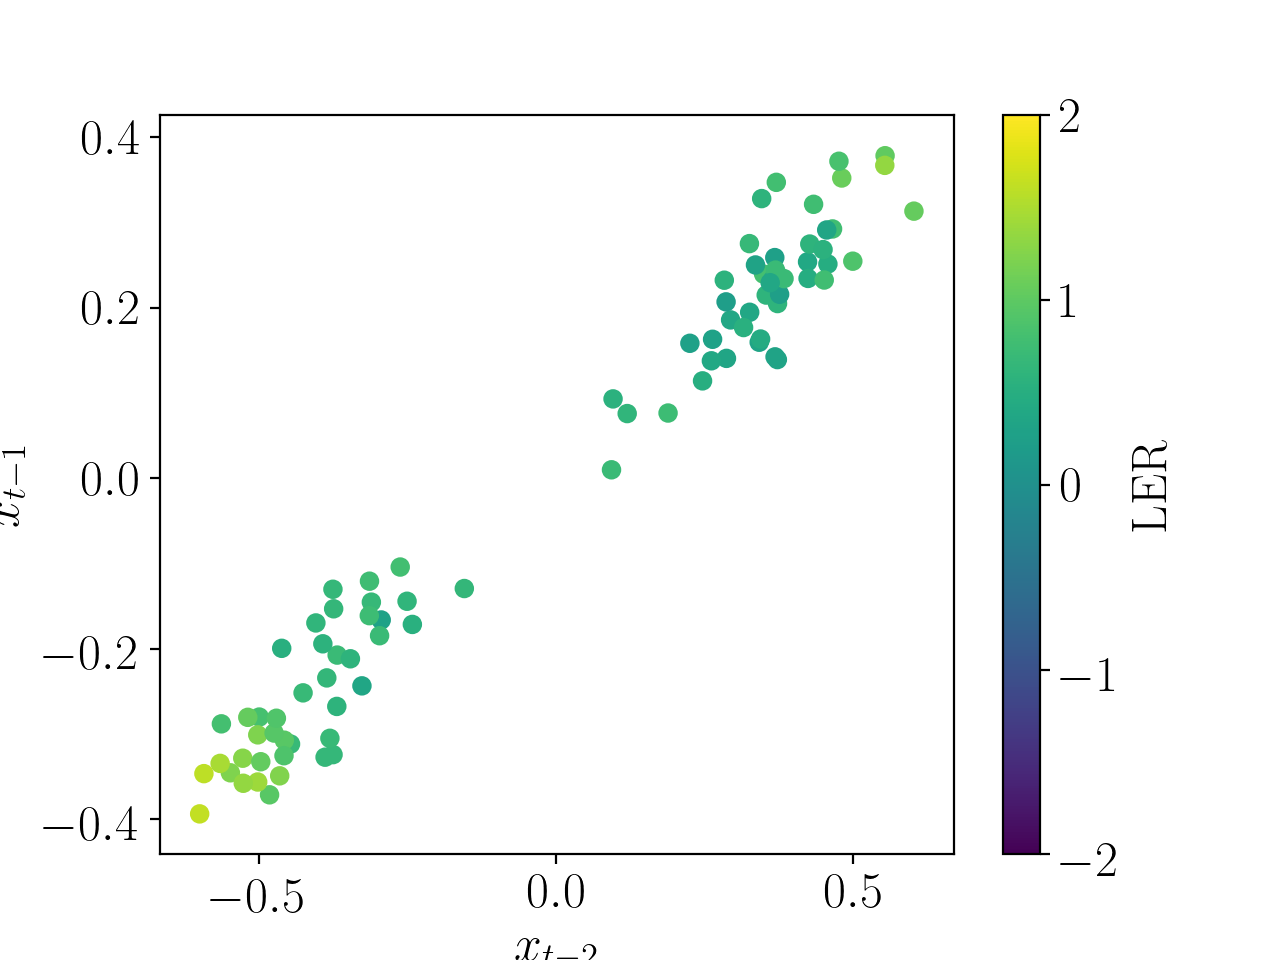

Text(0, 0.5, '$x_{t-1}$')

In [10]:
X_full = embed_ts(x, p_opt)
#be sure to sample and embed using the same rates as the demo-lser-choosep-knn code


ler_plot = [numpy.nan]*p_opt + ler.tolist()
ser_plot = [numpy.nan]*p_opt + ser.tolist()

xs = X_full[:,p_opt-3]
ys = X_full[:,p_opt-2]
zs = X_full[:,p_opt-1]
color3 = ser_plot[p_opt:]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
v=ax.scatter(xs, ys, zs, c=color3, vmin=-1.6, vmax=-0.5, marker='o')

cb = plt.colorbar(v)
cb.set_label('SER')

lims = [-2, 2]

ax.set_xlabel('$x_{t-3}$')
ax.set_ylabel('$x_{t-2}$')
ax.set_zlabel('$x_{t-1}$')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_zlim(lims)

fig = plt.figure()
ax = fig.add_subplot(111)

newx=[]
newy=[]
newz=[]
newcolor=[]
for x_val, y_val, c_val, hue in zip(xs, ys, zs, color3):
    if -0.05 < c_val < 0.05:
        newx.append(x_val)
        newy.append(y_val)
        newz.append(c_val)
        newcolor.append(hue) 

v3=ax.scatter(newx, newy, c=newcolor, vmin=-1.6, vmax=-0.5, marker='o')

cb3 = plt.colorbar(v3)
cb3.set_label('SER')

ax.set_xlabel('$x_{t-3}$')
ax.set_ylabel('$x_{t-2}$')

xs2 = X_full[:,p_opt-2]
ys2 = X_full[:,p_opt-1]
zs2 = X_full[:,p_opt]
color4 = ler_plot[p_opt:]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
v=ax.scatter(xs, ys, zs, c=color4, vmin=-2, vmax=2, marker='o')

cb = plt.colorbar(v)
cb.set_label('LER')

lims = [-2, 2]

ax.set_xlabel('$x_{t-2}$')
ax.set_ylabel('$x_{t-1}$')
ax.set_zlabel('$x_{t}$')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_zlim(lims)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

newx2=[]
newy2=[]
newz2=[]
newcolor2=[]
for x_val, y_val, c_val, hue in zip(xs2, ys2, zs2, color4):
    if -0.05 < c_val < 0.05:
        newx2.append(x_val)
        newy2.append(y_val)
        newz2.append(c_val)
        newcolor2.append(hue) 

v4=ax2.scatter(newx2, newy2, c=newcolor2, vmin=-2, vmax=2, marker='o')

cb4 = plt.colorbar(v4)
cb4.set_label('LER')

ax2.set_xlabel('$x_{t-2}$')
ax2.set_ylabel('$x_{t-1}$')